In [11]:
import os
from typing import Union
from PIL import Image
import torch
import torchvision.transforms as transforms

    # Load the image using PIL
image = Image.open('C:/Users/heman/Desktop/Deep learning/LLMs/Papers/AttentionIs All You Need/IMAGE/image1.png').convert("RGB")
image


input_size=(224,224)
# Define the transformations to be applied to the image
if isinstance(input_size, int):
    # Resize to a square image if input_size is an integer
    transformations = transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
else:
    # Resize to the specified height and width if input_size is a tuple
    transformations = transforms.Compose([
        transforms.Resize(input_size),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Apply the transformations to the image
    image_tensor = transformations(image)
image_tensor.shape

torch.Size([3, 224, 224])

In [12]:
import os
from typing import Union
from PIL import Image
import torch
import torchvision.transforms as transforms

def load_and_preprocess_image(image_path: str, input_size: Union[int, tuple]) -> torch.Tensor:
    """
    Load an image from the specified file path, resize it to the desired input size,
    normalize the pixel values, and convert it to a tensor suitable for input to a
    deep learning model.

    Args:
        image_path (str): The file path of the image to be loaded.
        input_size (int or tuple): The desired size of the image after resizing.
            If an integer is provided, the image will be resized to a square with the specified size.
            If a tuple is provided, it should be in the format (height, width).

    Returns:
        torch.Tensor: The preprocessed image tensor ready for input to a deep learning model.

    Example:
        image_tensor = load_and_preprocess_image("path/to/image.jpg", input_size=(224, 224))
    """
    # Check if the image file exists
    if not os.path.isfile(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")

    # Load the image using PIL
    image = Image.open(image_path).convert("RGB")

    # Define the transformations to be applied to the image
    if isinstance(input_size, int):
        # Resize to a square image if input_size is an integer
        transformations = transforms.Compose([
            transforms.Resize(input_size),
            transforms.CenterCrop(input_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
    else:
        # Resize to the specified height and width if input_size is a tuple
        transformations = transforms.Compose([
            transforms.Resize(input_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

    # Apply the transformations to the image
    image_tensor = transformations(image)

    return image_tensor

# Example usage
if __name__ == "__main__":
    image_path = 'C:/Users/heman/Desktop/Deep learning/LLMs/Papers/AttentionIs All You Need/IMAGE/image1.png'
    input_size = (224, 224)  # Specify the desired input size

    try:
        image_tensor = load_and_preprocess_image(image_path, input_size)
        print("Image preprocessed successfully.")
        print("Image tensor shape:", image_tensor.shape)
    except FileNotFoundError as e:
        print(f"Error: {str(e)}")

Image preprocessed successfully.
Image tensor shape: torch.Size([3, 224, 224])


In [13]:
import torch
from torchvision import transforms
from PIL import Image
from typing import Tuple

def load_and_preprocess_image(image_path: str, input_size: Tuple[int, int], normalization_range: Tuple[float, float]) -> torch.Tensor:
    """
    Loads an image from a file, resizes it, normalizes it, and converts it to a tensor.

    Parameters:
    - image_path (str): Path to the image file.
    - input_size (Tuple[int, int]): The (height, width) to which the image should be resized.
    - normalization_range (Tuple[float, float]): The range for normalizing pixel values (min_value, max_value).

    Returns:
    - torch.Tensor: The preprocessed image tensor.

    Example usage:
    >>> tensor_image = load_and_preprocess_image('path/to/image.jpg', (224, 224), (0, 1))
    >>> print(tensor_image.shape)
    torch.Size([3, 224, 224])
    """
    
    # Define the transformations to be applied to the image
    if isinstance(input_size, int):
        # Resize to a square image if input_size is an integer
        transformations = transforms.Compose([
            transforms.Resize(input_size),
            transforms.CenterCrop(input_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
    else:
        # Resize to the specified height and width if input_size is a tuple
        transformations = transforms.Compose([
            transforms.Resize(input_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

    # Load the image
    image = Image.open(image_path).convert('RGB')

    # Apply the transformations to the image
    tensor_image =transformations(image)

    return tensor_image

# User input for image path
image_path = 'C:/Users/heman/Desktop/Deep learning/LLMs/Papers/AttentionIs All You Need/IMAGE/image1.png'

# You can set the input size and normalization range as required by your model.
# For example, input_size could be (224, 224) for models like ResNet, and
# normalization_range could be (0.0, 1.0) or (-1.0, 1.0) depending on the model's expected input.
input_size = (224, 224)  # Example input size
normalization_range = (0.0, 1.0)  # Example normalization range

# Load and preprocess the image
preprocessed_image = load_and_preprocess_image(image_path, input_size, normalization_range)

# Print the shape of the preprocessed image tensor
print(f"Preprocessed image tensor shape: {preprocessed_image.shape}")

Preprocessed image tensor shape: torch.Size([3, 224, 224])


In [14]:
import os
from typing import Union, List
from PIL import Image
import torch
import torchvision.transforms as transforms

def load_and_preprocess_image(image_path: str, input_size: Union[int, tuple], transformations: List[str]) -> torch.Tensor:
    """
    Load an image from the specified file path, resize it to the desired input size,
    apply the specified transformations, and convert it to a tensor suitable for input to a
    deep learning model.

    Args:
        image_path (str): The file path of the image to be loaded.
        input_size (int or tuple): The desired size of the image after resizing.
            If an integer is provided, the image will be resized to a square with the specified size.
            If a tuple is provided, it should be in the format (height, width).
        transformations (list): A list of strings specifying the transformations to be applied to the image tensor.
            Supported transformations: "rotate", "flip", "crop", "scale", "translate", "shear",
            "brightness_contrast", "noise", "color", "blur_sharpen".

    Returns:
        torch.Tensor: The preprocessed image tensor with the specified transformations applied.

    Example:
        image_tensor = load_and_preprocess_image("path/to/image.jpg", input_size=(224, 224), transformations=["rotate", "flip"])
    """
    # Check if the image file exists
    if not os.path.isfile(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")

    # Load the image using PIL
    image = Image.open(image_path).convert("RGB")

    # Define the transformations to be applied to the image
    if isinstance(input_size, int):
        # Resize to a square image if input_size is an integer
        transform_list = [
            transforms.Resize(input_size),
            transforms.CenterCrop(input_size),
        ]
    else:
        # Resize to the specified height and width if input_size is a tuple
        transform_list = [
            transforms.Resize(input_size),
        ]

    # Add the specified transformations to the transform list
    for transform in transformations:
        if transform == "rotate":
            transform_list.append(transforms.RandomRotation(degrees=10))
        elif transform == "flip":
            transform_list.append(transforms.RandomHorizontalFlip(p=0.5))
        elif transform == "crop":
            transform_list.append(transforms.RandomCrop(size=(200, 200)))
        elif transform == "scale":
            transform_list.append(transforms.RandomResizedCrop(size=input_size, scale=(0.8, 1.0)))
        elif transform == "translate":
            transform_list.append(transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)))
        elif transform == "shear":
            transform_list.append(transforms.RandomAffine(degrees=0, shear=10))
        elif transform == "brightness_contrast":
            transform_list.append(transforms.ColorJitter(brightness=0.2, contrast=0.2))
        elif transform == "noise":
            transform_list.append(transforms.Lambda(lambda x: x + torch.randn_like(x) * 0.1))
        elif transform == "color":
            transform_list.append(transforms.ColorJitter(hue=0.1, saturation=0.1))
        elif transform == "blur_sharpen":
            transform_list.append(transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)))
        else:
            raise ValueError(f"Unsupported transformation: {transform}")

    transform_list.extend([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    transformations = transforms.Compose(transform_list)

    # Apply the transformations to the image
    image_tensor = transformations(image)

    return image_tensor

# User input for image path
image_path = 'C:/Users/heman/Desktop/Deep learning/LLMs/Papers/AttentionIs All You Need/IMAGE/image1.png'

# You can set the input size and normalization range as required by your model.
# For example, input_size could be (224, 224) for models like ResNet, and
# normalization_range could be (0.0, 1.0) or (-1.0, 1.0) depending on the model's expected input.
input_size = (224, 224) 
selected_transformations=['rotate','flip','crop','scale','translate','shear','brightness_contrast',"blur_sharpen"]
image_tensor = load_and_preprocess_image(image_path, input_size, selected_transformations)
image_tensor.shape

torch.Size([3, 224, 224])

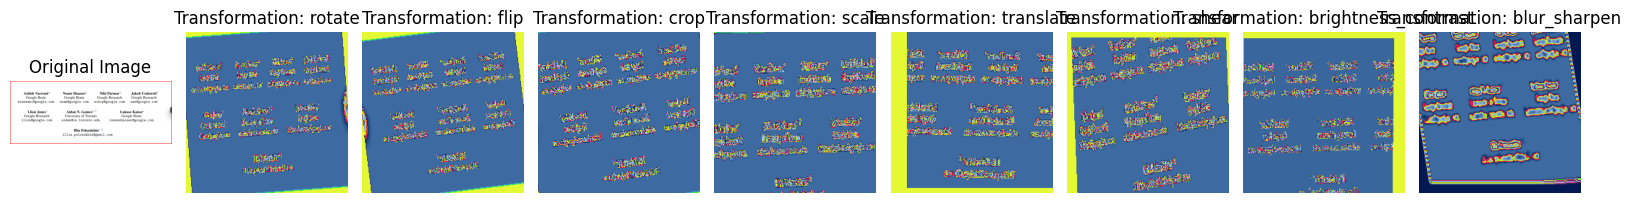

In [15]:
import os
from typing import Union, List
from PIL import Image
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt



def plot_transformations(image_path, input_size, selected_transformations):
    # Load the original image
    original_image = Image.open(image_path).convert("RGB")

    # Create a figure with subplots
    num_transformations = len(selected_transformations) + 1
    fig, axes = plt.subplots(1, num_transformations, figsize=(16, 16))

    # Plot the original image
    axes[0].imshow(original_image)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    # Apply and plot each transformation cumulatively
    cumulative_transforms = []
    for i, transform in enumerate(selected_transformations, start=1):
        cumulative_transforms.append(transform)
        image_tensor = load_and_preprocess_image(image_path, input_size, cumulative_transforms)
        transformed_image = transforms.ToPILImage()(image_tensor)

        axes[i].imshow(transformed_image)
        axes[i].set_title(f"Transformation: {transform}")
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()

# User input for image path
image_path = 'C:/Users/heman/Desktop/Deep learning/LLMs/Papers/AttentionIs All You Need/IMAGE/image1.png'

# Set the input size and selected transformations
input_size = (224, 224)
selected_transformations = ['rotate', 'flip', 'crop', 'scale', 'translate', 'shear', 'brightness_contrast', 'blur_sharpen']

# Plot the transformations
plot_transformations(image_path, input_size, selected_transformations)

In [16]:
import torch
import torchvision.transforms.functional as TF
import random

# Function to apply transformations
def apply_transformations(tensor_image: torch.Tensor):
    """
    Apply selected transformations to the preprocessed image tensor.

    Parameters:
    - tensor_image (torch.Tensor): The preprocessed image tensor.

    Returns:
    - torch.Tensor: The transformed image tensor.
    """

    transformations = {
        'rotate': lambda image: TF.rotate(image, angle=random.uniform(-180, 180)),
        'horizontal_flip': lambda image: TF.hflip(image),
        'vertical_flip': lambda image: TF.vflip(image),
        'crop': lambda image: TF.center_crop(image, output_size=[int(image.shape[1] * 0.9), int(image.shape[2] * 0.9)]),
        'scale': lambda image: TF.resize(image, size=[int(image.shape[1] * random.uniform(0.5, 1.5)), int(image.shape[2] * random.uniform(0.5, 1.5))]),
        'translate': lambda image: TF.affine(image, angle=0, translate=[int(random.uniform(-10, 10)), int(random.uniform(-10, 10))], scale=1, shear=[0, 0]),
        'shear': lambda image: TF.affine(image, angle=0, translate=[0, 0], scale=1, shear=[random.uniform(-30, 30), random.uniform(-30, 30)]),
        'brightness': lambda image: TF.adjust_brightness(image, brightness_factor=random.uniform(0.5, 1.5)),
        'contrast': lambda image: TF.adjust_contrast(image, contrast_factor=random.uniform(0.5, 1.5)),
        'noise': lambda image: image + torch.randn_like(image) * 0.1,
        'color': lambda image: TF.adjust_hue(image, hue_factor=random.uniform(-0.5, 0.5)),
        'blur': lambda image: TF.gaussian_blur(image, kernel_size=[5, 9], sigma=[0.1, 5]),
        'sharpen': lambda image: TF.adjust_sharpness(image, sharpness_factor=random.uniform(0.5, 2))
    }

    # Ask the user which transformations to apply
    selected_transformations = ['rotate','horizontal_flip','vertical_flip','crop','scale','translate','shear','brightness','contrast','noise','color','blur','sharpen']

    # Apply each selected transformation
    for transformation in selected_transformations:
        transformation = transformation.strip()  # Remove leading/trailing whitespace
        if transformation in transformations:
            tensor_image = transformations[transformation](tensor_image)
        else:
            print(f"Transformation '{transformation}' is not recognized. Skipping.")

    return tensor_image

# Load and preprocess the image
# (This part would be the same as the previous example, where the user provides the image path and the preprocessed_image is obtained)
    # Load the image using PIL
image = Image.open('C:/Users/heman/Desktop/Deep learning/LLMs/Papers/AttentionIs All You Need/IMAGE/image1.png').convert("RGB")

# # Apply user-selected transformations
transformed_image = apply_transformations(preprocessed_image)

# Display the final image tensor shape
print(f"Transformed image tensor shape: {transformed_image.shape}")





Transformed image tensor shape: torch.Size([3, 178, 237])


c:\Users\heman\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


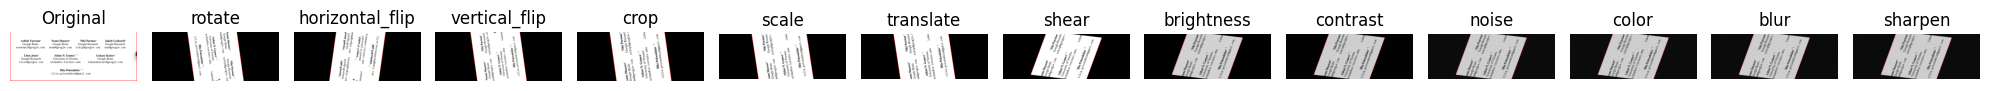

In [17]:
import torch
import torchvision.transforms.functional as TF
import random
from PIL import Image
import matplotlib.pyplot as plt

# Function to apply transformations
def apply_transformations(tensor_image: torch.Tensor, selected_transformations: list):
    """
    Apply selected transformations to the preprocessed image tensor.

    Parameters:
    - tensor_image (torch.Tensor): The preprocessed image tensor.
    - selected_transformations (list): List of selected transformations to apply.

    Returns:
    - list: List of transformed image tensors.
    """

    transformations = {
        'rotate': lambda image: TF.rotate(image, angle=random.uniform(-180, 180)),
        'horizontal_flip': lambda image: TF.hflip(image),
        'vertical_flip': lambda image: TF.vflip(image),
        'crop': lambda image: TF.center_crop(image, output_size=[int(image.shape[1] * 0.9), int(image.shape[2] * 0.9)]),
        'scale': lambda image: TF.resize(image, size=[int(image.shape[1] * random.uniform(0.5, 1.5)), int(image.shape[2] * random.uniform(0.5, 1.5))]),
        'translate': lambda image: TF.affine(image, angle=0, translate=[int(random.uniform(-10, 10)), int(random.uniform(-10, 10))], scale=1, shear=[0, 0]),
        'shear': lambda image: TF.affine(image, angle=0, translate=[0, 0], scale=1, shear=[random.uniform(-30, 30), random.uniform(-30, 30)]),
        'brightness': lambda image: TF.adjust_brightness(image, brightness_factor=random.uniform(0.5, 1.5)),
        'contrast': lambda image: TF.adjust_contrast(image, contrast_factor=random.uniform(0.5, 1.5)),
        'noise': lambda image: image + torch.randn_like(image) * 0.1,
        'color': lambda image: TF.adjust_hue(image, hue_factor=random.uniform(-0.5, 0.5)),
        'blur': lambda image: TF.gaussian_blur(image, kernel_size=[5, 9], sigma=[0.1, 5]),
        'sharpen': lambda image: TF.adjust_sharpness(image, sharpness_factor=random.uniform(0.5, 2))
    }

    cumulative_images = [tensor_image]  # Initialize with the original image

    # Apply each selected transformation
    for transformation in selected_transformations:
        transformation = transformation.strip()  # Remove leading/trailing whitespace
        if transformation in transformations:
            transformed_image = transformations[transformation](tensor_image)
            cumulative_images.append(transformed_image)  # Append the transformed image
            tensor_image = transformed_image  # Update the tensor_image for cumulative effect
        else:
            print(f"Transformation '{transformation}' is not recognized. Skipping.")

    return cumulative_images

# Load and preprocess the image
# (This part would be the same as the previous example, where the user provides the image path and the preprocessed_image is obtained)
image = Image.open('C:/Users/heman/Desktop/Deep learning/LLMs/Papers/AttentionIs All You Need/IMAGE/image1.png').convert("RGB")
# preprocessed_image = ...  # Preprocess the image as per your requirements
preprocessed_image=TF.to_tensor(image)
# Ask the user which transformations to apply
selected_transformations = ['rotate', 'horizontal_flip', 'vertical_flip', 'crop', 'scale', 'translate', 'shear', 'brightness', 'contrast', 'noise', 'color', 'blur', 'sharpen']

# Apply user-selected transformations
cumulative_images = apply_transformations(preprocessed_image, selected_transformations)

# Display the images one by one
fig, axes = plt.subplots(1, len(cumulative_images), figsize=(20, 5))
for i, transformed_image in enumerate(cumulative_images):
    if transformed_image.dim() == 3:
        axes[i].imshow(transformed_image.permute(1, 2, 0).numpy())  # Convert from CxHxW to HxWxC
    else:
        axes[i].imshow(transformed_image.numpy(), cmap='gray')  # Display grayscale image
    axes[i].axis('off')
    if i == 0:
        axes[i].set_title("Original")
    else:
        axes[i].set_title(f"{selected_transformations[i-1]}")

plt.tight_layout()
plt.show()

In [18]:
from PIL import Image
from typing import List, Tuple
import os

def split_image_into_chunks(image_path: str, chunk_size: Tuple[int, int] = (16, 16)) -> List[Image.Image]:
    """
    Splits an image into smaller chunks of a specified size.

    :param image_path: The file path to the image to be split.
    :param chunk_size: The size of each chunk (width, height).
    :return: A list of Image objects, each representing a chunk of the original image.
    """
    try:
        # Load the image from the specified path
        image = Image.open(image_path)
    except IOError:
        print(f"Error: Cannot open the image from the path {image_path}. Please check the file path.")
        return []

    # Calculate the number of chunks in each dimension
    img_width, img_height = image.size
    chunks_x = img_width // chunk_size[0]
    chunks_y = img_height // chunk_size[1]

    # Split the image into chunks
    chunks = []
    for y in range(0, chunks_y * chunk_size[1], chunk_size[1]):
        for x in range(0, chunks_x * chunk_size[0], chunk_size[0]):
            box = (x, y, x + chunk_size[0], y + chunk_size[1])
            chunk = image.crop(box)
            chunks.append(chunk)

    return chunks

def save_chunks(chunks: List[Image.Image], output_dir: str) -> None:
    """
    Saves each image chunk to a specified directory.

    :param chunks: A list of Image objects to be saved.
    :param output_dir: The directory where the image chunks will be saved.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, chunk in enumerate(chunks):
        output_path = os.path.join(output_dir, f"chunk_{i:03d}.png")
        chunk.save(output_path)
        print(f"Saved {output_path}")

# Example usage
if __name__ == "__main__":
    image_path_input = 'C:/Users/heman/Desktop/Deep learning/LLMs/Papers/AttentionIs All You Need/IMAGE/image1.png'
    chunks = split_image_into_chunks(image_path_input,chunk_size=(200,200))
    
    if chunks:
        output_directory = "image_chunks1"
        save_chunks(chunks, output_directory)
        print(f"All chunks have been successfully saved to {output_directory}.")

Saved image_chunks1\chunk_000.png
Saved image_chunks1\chunk_001.png
Saved image_chunks1\chunk_002.png
Saved image_chunks1\chunk_003.png
Saved image_chunks1\chunk_004.png
Saved image_chunks1\chunk_005.png
Saved image_chunks1\chunk_006.png
Saved image_chunks1\chunk_007.png
Saved image_chunks1\chunk_008.png
Saved image_chunks1\chunk_009.png
Saved image_chunks1\chunk_010.png
Saved image_chunks1\chunk_011.png
Saved image_chunks1\chunk_012.png
Saved image_chunks1\chunk_013.png
Saved image_chunks1\chunk_014.png
Saved image_chunks1\chunk_015.png
Saved image_chunks1\chunk_016.png
Saved image_chunks1\chunk_017.png
Saved image_chunks1\chunk_018.png
Saved image_chunks1\chunk_019.png
Saved image_chunks1\chunk_020.png
Saved image_chunks1\chunk_021.png
Saved image_chunks1\chunk_022.png
Saved image_chunks1\chunk_023.png
All chunks have been successfully saved to image_chunks1.


24 chunks were created.
(200, 200) chunk_size


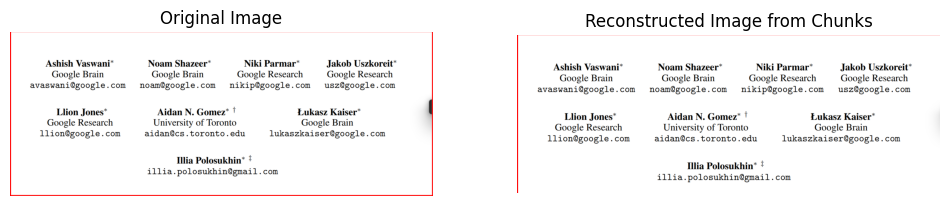

In [10]:
from typing import List, Tuple
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

def split_image_into_chunks(image_path: str, chunk_size: Tuple[int, int] = (16, 16)) -> List[Image.Image]:
    """
    Splits an image into smaller chunks of a specified size.

    :param image_path: The file path to the image to be split.
    :param chunk_size: The size of each chunk (width, height).
    :return: A list of Image objects, each representing a chunk of the original image.
    """
    try:
        # Load the image from the specified path
        image = Image.open(image_path)
    except IOError:
        print(f"Error: Cannot open the image from the path {image_path}. Please check the file path.")
        return []

    # Calculate the number of chunks in each dimension
    img_width, img_height = image.size
    chunks_x = img_width // chunk_size[0]
    chunks_y = img_height // chunk_size[1]

    # Split the image into chunks
    chunks = []
    for y in range(0, chunks_y * chunk_size[1], chunk_size[1]):
        for x in range(0, chunks_x * chunk_size[0], chunk_size[0]):
            box = (x, y, x + chunk_size[0], y + chunk_size[1])
            chunk = image.crop(box)
            chunks.append(chunk)

    return chunks

def plot_image_chunks(chunks: List[Image.Image], chunk_size: Tuple[int, int], original_image: Image.Image):
    """
    Plots all the chunks to form an image plot and compares it with the original image.

    :param chunks: A list of Image objects representing the chunks of the original image.
    :param chunk_size: The size of each chunk (width, height).
    :param original_image: The original Image object.
    """
    # Calculate number of chunks in each dimension
    chunks_x = original_image.size[0] // chunk_size[0]
    chunks_y = original_image.size[1] // chunk_size[1]
    
    # Create a new image to place the chunks
    new_image = Image.new('RGB', (chunks_x * chunk_size[0], chunks_y * chunk_size[1]))
    
    # Place each chunk into the new image
    for i, chunk in enumerate(chunks):
        x = (i % chunks_x) * chunk_size[0]
        y = (i // chunks_x) * chunk_size[1]
        new_image.paste(chunk, (x, y))
    
    # Plot the original and the reconstructed image side by side
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original_image)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Reconstructed Image from Chunks')
    plt.imshow(new_image)
    plt.axis('off')

    plt.show()

# Example usage
if __name__ == "__main__":
    # Define the image path and the chunk size
    image_path = 'C:/Users/heman/Desktop/Deep learning/LLMs/Papers/AttentionIs All You Need/IMAGE/image1.png'
    chunk_size = (200, 200)
    
    # Split the image into chunks
    chunks = split_image_into_chunks(image_path, chunk_size)
    print(len(chunks), 'chunks were created.')
    print(chunks[0].size,'chunk_size')
    # Load the original image
    original_image = Image.open(image_path)
    
    # Plot the image chunks and compare with the original
    plot_image_chunks(chunks, chunk_size, original_image)
    
    

In [5]:
import os
from typing import Tuple
from PIL import Image

def split_image(image_path: str, split_size: Tuple[int, int] = (200, 200)) -> None:
    """
    Split an image into smaller splits of a specified size.

    Args:
        image_path (str): The path to the input image file.
        split_size (Tuple[int, int]): The size of each split (width, height). Default is (16, 16).

    Returns:
        None
    """
    # Open the image
    image = Image.open(image_path)

    # Get the image dimensions
    width, height = image.size

    # Calculate the number of splits in each dimension
    num_splits_x = width // split_size[0]
    num_splits_y = height // split_size[1]

    # Create a directory to store the splits
    output_dir = "image_splits"
    os.makedirs(output_dir, exist_ok=True)

    # Iterate over the splits and save each one
    for i in range(num_splits_y):
        for j in range(num_splits_x):
            left = j * split_size[0]
            top = i * split_size[1]
            right = left + split_size[0]
            bottom = top + split_size[1]

            # Crop the image to the current split
            split = image.crop((left, top, right, bottom))

            # Save the split image
            split_path = os.path.join(output_dir, f"split_{i}_{j}.png")
            split.save(split_path)

    print(f"Image split into {num_splits_x * num_splits_y} splits and saved in '{output_dir}' directory.")

# Example usage
image_path = 'C:/Users/heman/Desktop/Deep learning/LLMs/Papers/AttentionIs All You Need/IMAGE/image1.png'
split_image(image_path)

Image split into 24 splits and saved in 'image_splits' directory.


In [ ]:
import os
from typing import Union, List
from PIL import Image
import torch
import torchvision.transforms as transforms

def load_and_preprocess_image(image_path: str, input_size: Union[int, tuple], transformations: List[str]) -> torch.Tensor:
    """
    Load an image from the specified file path, resize it to the desired input size,
    apply the specified transformations, and convert it to a tensor suitable for input to a
    deep learning model.

    Args:
        image_path (str): The file path of the image to be loaded.
        input_size (int or tuple): The desired size of the image after resizing.
            If an integer is provided, the image will be resized to a square with the specified size.
            If a tuple is provided, it should be in the format (height, width).
        transformations (list): A list of strings specifying the transformations to be applied to the image tensor.
            Supported transformations: "rotate", "flip", "crop", "scale", "translate", "shear",
            "brightness_contrast", "noise", "color", "blur_sharpen".

    Returns:
        torch.Tensor: The preprocessed image tensor with the specified transformations applied.

    Example:
        image_tensor = load_and_preprocess_image("path/to/image.jpg", input_size=(224, 224), transformations=["rotate", "flip"])
    """
    # Check if the image file exists
    if not os.path.isfile(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")

    # Load the image using PIL
    image = Image.open(image_path).convert("RGB")

    # Define the transformations to be applied to the image
    if isinstance(input_size, int):
        # Resize to a square image if input_size is an integer
        transform_list = [
            transforms.Resize(input_size),
            transforms.CenterCrop(input_size),
        ]
    else:
        # Resize to the specified height and width if input_size is a tuple
        transform_list = [
            transforms.Resize(input_size),
        ]

    # Add the specified transformations to the transform list
    for transform in transformations:
        if transform == "rotate":
            transform_list.append(transforms.RandomRotation(degrees=10))
        elif transform == "flip":
            transform_list.append(transforms.RandomHorizontalFlip(p=0.5))
        elif transform == "crop":
            transform_list.append(transforms.RandomCrop(size=(200, 200)))
        elif transform == "scale":
            transform_list.append(transforms.RandomResizedCrop(size=input_size, scale=(0.8, 1.0)))
        elif transform == "translate":
            transform_list.append(transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)))
        elif transform == "shear":
            transform_list.append(transforms.RandomAffine(degrees=0, shear=10))
        elif transform == "brightness_contrast":
            transform_list.append(transforms.ColorJitter(brightness=0.2, contrast=0.2))
        elif transform == "noise":
            transform_list.append(transforms.Lambda(lambda x: x + torch.randn_like(x) * 0.1))
        elif transform == "color":
            transform_list.append(transforms.ColorJitter(hue=0.1, saturation=0.1))
        elif transform == "blur_sharpen":
            transform_list.append(transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)))
        else:
            raise ValueError(f"Unsupported transformation: {transform}")

    transform_list.extend([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    transformations = transforms.Compose(transform_list)

    # Apply the transformations to the image
    image_tensor = transformations(image)

    return image_tensor

# Example usage
if __name__ == "__main__":
    image_path = input("Enter the path to the image file: ")
    input_size = (224, 224)  # Specify the desired input size

    # Prompt the user to enter the desired transformations
    print("Available transformations:")
    print("1. Rotation")
    print("2. Flipping")
    print("3. Cropping")
    print("4. Scaling")
    print("5. Translation")
    print("6. Shearing")
    print("7. Brightness and Contrast Adjustment")
    print("8. Noise Injection")
    print("9. Color Manipulation")
    print("10. Blur and Sharpening")

    selected_transformations = []
    while True:
        transformation = input("Enter the number of the transformation to apply (or press Enter to finish): ")
        if transformation == "":
            break
        elif transformation == "1":
            selected_transformations.append("rotate")
        elif transformation == "2":
            selected_transformations.append("flip")
        elif transformation == "3":
            selected_transformations.append("crop")
        elif transformation == "4":
            selected_transformations.append("scale")
        elif transformation == "5":
            selected_transformations.append("translate")
        elif transformation == "6":
            selected_transformations.append("shear")
        elif transformation == "7":
            selected_transformations.append("brightness_contrast")
        elif transformation == "8":
            selected_transformations.append("noise")
        elif transformation == "9":
            selected_transformations.append("color")
        elif transformation == "10":
            selected_transformations.append("blur_sharpen")
        else:
            print("Invalid transformation number. Please try again.")

    try:
        image_tensor = load_and_preprocess_image(image_path, input_size, selected_transformations)
        print("Image preprocessed successfully.")
        print("Image tensor shape:", image_tensor.shape)
    except FileNotFoundError as e:
        print(f"Error: {str(e)}")
    except ValueError as e:
        print(f"Error: {str(e)}")